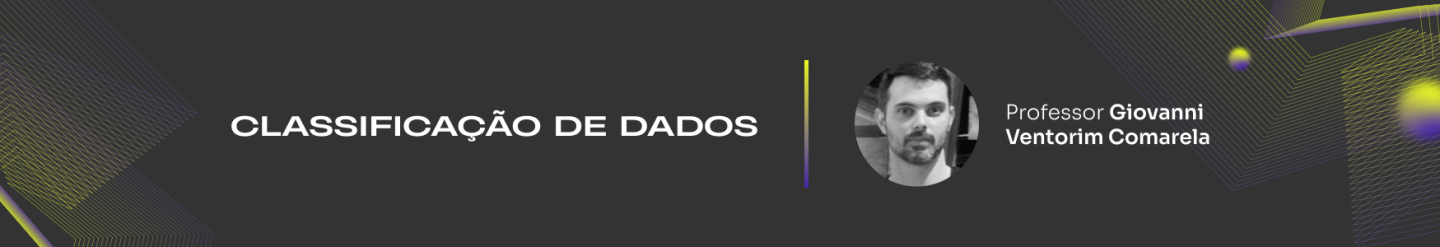

#*Support Vector Machine* (SVM) - Parte II

## Aula Passada

**Entrada:**
- $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, um conjunto de pontos rotulados (problema de classificação binária) **que pode ser separado** por uma função linear (hiperplano)

**Objetivo:**
- Encontrar o "melhor" hiperplano de separação.

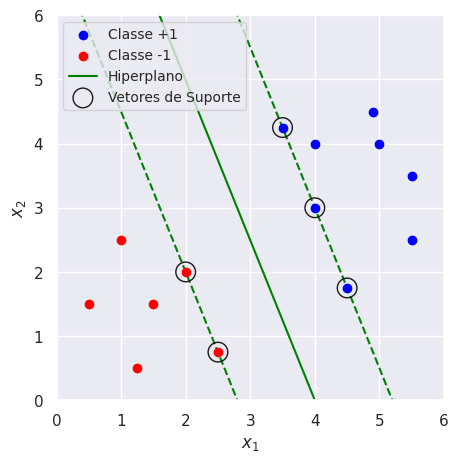

In [ ]:
#@title Hiperplano, Margem e Vetores de Suporte

import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

df = pd.DataFrame([[3.5, 4.25, 1],
     [4, 3, 1],
     [4, 4, 1],
     [4.5, 1.75, 1],
     [4.9, 4.5, 1],
     [5, 4, 1],
     [5.5, 2.5, 1],
     [5.5, 3.5, 1],
     [0.5, 1.5, -1],
     [1, 2.5, -1],
     [1.25, 0.5, -1],
     [1.5, 1.5, -1],
     [2, 2, -1],
     [2.5, 0.75, -1]], columns = 'u1 u2 y'.split())

#@title Ilustração de Hiperplano, Margem e Vetores de Suporte

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def plot_vector(v, color, org = np.array([0, 0]), zorder = 0, alpha = 0.8):
  plt.quiver(org[0], org[1], v[0], v[1],
       color = color,
       zorder = 10, alpha = alpha, width = 0.013, angles='xy', scale_units='xy', scale=1)

fig = plt.figure(figsize = (5, 5))
df1 = df[df['y'] == 1]
plt.scatter(df1['u1'], df1['u2'], c = 'blue', label = 'Classe +1', zorder = 2)
df2 = df[df['y'] == -1]
plt.scatter(df2['u1'], df2['u2'], c = 'red', label = 'Classe -1', zorder = 2)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')


x0 = np.array([0, 5])
y0 = -(1 / 0.334) * (0.833 * x0 - 3.332)
plt.plot(x0, y0, color = 'green', label = 'Hiperplano')

xx = df['u1']
yy = df['u2']

m = (yy[1] - yy[0]) / (xx[1] - xx[0])
b = yy[0] - m * xx[0]
x1 = np.array([0, 6])
y1 = m * x1 + b
plt.plot(x1, y1, color = 'green', linestyle = 'dashed', zorder = 1)

m = (yy[13] - yy[12]) / (xx[13] - xx[12])
b = yy[12] - m * xx[12]
x2 = np.array([0, 6])
y2 = m * x1 + b
plt.plot(x2, y2, color = 'green', linestyle = 'dashed', zorder = 1)


plt.scatter([xx[0], xx[1], xx[3], xx[12], xx[13]], [yy[0], yy[1], yy[3], yy[12], yy[13]] , s=200,
           linewidth=1, facecolors='none', edgecolors='k', label = 'Vetores de Suporte')


plt.xlim((0, 6))
plt.ylim((0, 6));

plt.legend(loc = 2, prop={'size': 10});

plt.show();


### Formulação

A ideia fundamental do SVM é encontrar a representação canônica de um hiperplano de separação que tenha **margem máxima** entre todos os hiperplanos de separação (que separem $D$ de forma pura).

**Função objetivo:**
$$\min_{\mathbf{w}, b} \frac{\Vert\mathbf{w}\Vert^2}{2}$$

**Restrições:** $y_i(\mathbf{w}^T\mathbf{x}_i+b) \ge 1$, para $i = 1, \dots, n$.

## SVM para casos *quase* linearmente separáveis

Considere o seguinte conjunto de dados.

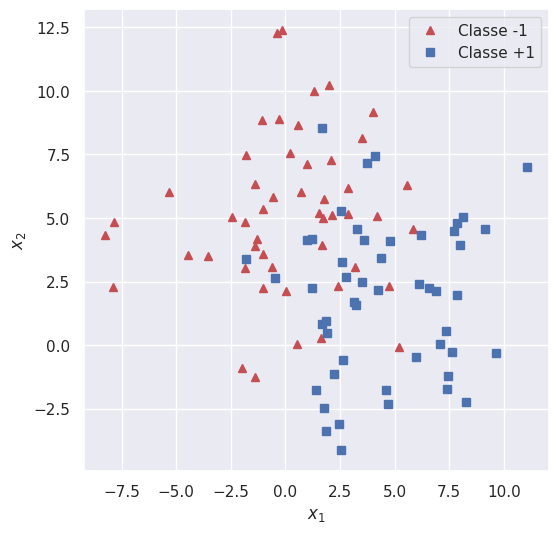

In [ ]:
#@title

import matplotlib.pyplot as plt
from sklearn import datasets

plt.figure(figsize = (6,6))
X, y = datasets.make_blobs(n_samples = 100, centers = 2, n_features = 2, center_box = (0, 10), cluster_std=3, random_state = 9)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = 'Classe -1')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'Classe +1')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 'best');

Pode-se perceber que o conjunto de dados acima **não** é linearmente separável! Não existe nenhuma reta que separe os elementos das duas classes de forma pura.

No entanto, o conjunto de dados é *quase* linearmente separável. Isso significa que existe uma reta que separa os elementos das duas classes de forma "razoável" (figura abaixo).

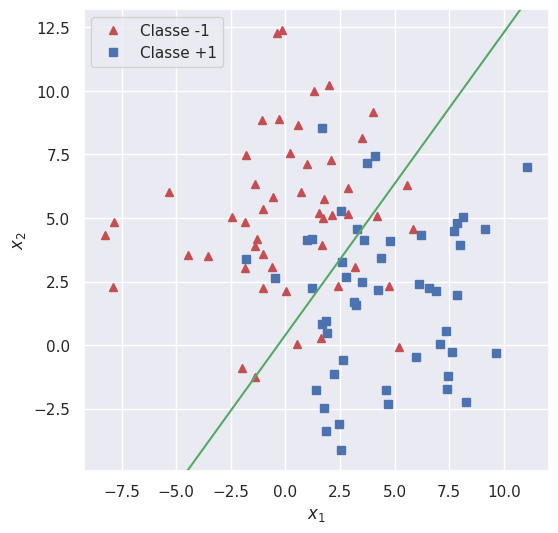

In [ ]:
#@title

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

clf = svm.SVC(kernel = "linear", C = 0.01)
clf.fit(X, y);

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-50, 50)
yy = a * xx - (clf.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(figsize = (6, 6))

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = 'Classe -1')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'Classe +1')


xl = plt.xlim()
yl = plt.ylim()

#plt.scatter(
#        clf.support_vectors_[:, 0],
#        clf.support_vectors_[:, 1],
#        s = 90,
#        facecolors="none",
#        zorder=10,
#        edgecolors="k",
#        cmap=cm.get_cmap("RdBu"), label = "Vetores de Suporte")

plt.plot(xx, yy, "g-")
#plt.plot(xx, yy_down, "k--")
#plt.plot(xx, yy_up, "k--")

plt.xlim(xl)
plt.ylim(yl)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend(loc = 'best');

Na aula de hoje, vamos estender a metodologia vista na aula passada para problemas que podem ser **bem** separados por um hiperplano (mesmo que de forma **não perfeita**).

A ideia, na verdade, é muito similar ao que já fizemos. Vamos buscar por um hiperplano de **margem máxima** que separe as duas classes.

No entanto, vamos permitir algumas **violações** da margem.

**Assim, queremos um hiperplano de margem máxima e erro mínimo!**

A figura abaixo ilustra a situação apresentada.

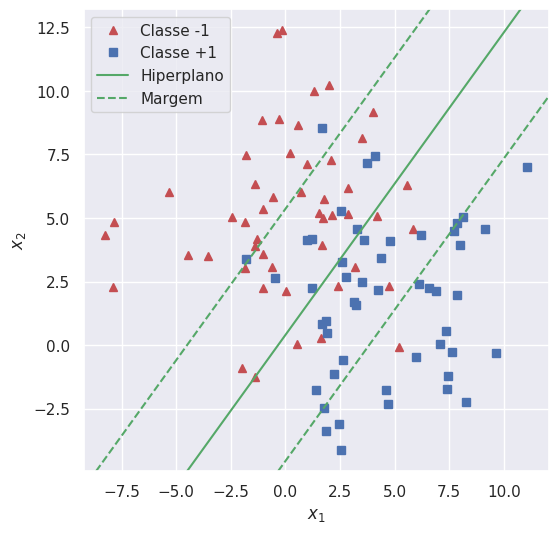

In [ ]:
#@title
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-50, 50)
yy = a * xx - (clf.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(figsize = (6, 6))

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = 'Classe -1')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'Classe +1')

xl = plt.xlim()
yl = plt.ylim()

plt.plot(xx, yy, "g-", label = 'Hiperplano')
plt.plot(xx, yy_down, "g--")
plt.plot(xx, yy_up, "g--", label = 'Margem')

plt.xlim(xl)
plt.ylim(yl)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend(loc = 'best');

Para incorporar essa ideia de erro/violação da margem, vamos adicionar novas variáveis ao problema.

Para cada elemento do conjunto de dados, vamos criar uma variável $\xi_i$ ($i = 1, \dots, n$), que representa o **grau de violação que o elemento possui com relação a margem**.

Há várias formas de quantificar o grau de violação. Uma delas é dada da seguinte maneira:

$$
\xi_i =
\begin{cases}
  0, \text{se o elemento está do lado certo da margem.}\\
  1 - y_i(\mathbf{w}^T\mathbf{x}_i + b), \text{caso contrário}
\end{cases}
$$

Essa definição de erro (conhecida como *Hinge Loss*) garante que:
1. Elementos que não violem a margem tenham $\xi_i = 0$
2. Elementos que violam a margem mas não violam o hiperplano tenham $0 < \xi_i \le 1$
3. Elementos que violam o hiperplano tenham $\xi_i > 1$

### O problema de otimização

Da discussão acima, queremos:

1. Um classificador de margem máxima. Ou seja, queremos minimizar $\frac{1}{2}\Vert\mathbf{w}\Vert^2$.

2. Queremos um classificador com erro pequeno. Ou seja, queremos minimizar $\sum_{i = 1}^n\xi_i$

Combinando a intuição que aprendemos acima com a aula passada, temos o seguinte problema de otimização.

**Objetivo**
$$\min_{\mathbf{w}, b, \xi}\frac{1}{2}\Vert\mathbf{w}\Vert^2 + C\sum_{i = 1}^n\xi_i$$

**Restrições**
1. $y_i(\mathbf{w}^T\mathbf{x}_i + b) \ge 1 - \xi_i$, $i = 1, \dots, n$
2. $\xi_i \ge 0$, $i = 1, \dots, n$.

O que é o $C$?

1. $C$ é uma constante e deve ser fornecido pelo usuário. É um hiperparâmetro! Idealmente, deve ser encontrado de acordo com alguma técnica de validação cruzada.

2. $C$ controla a relação entre **margem** e **erro**.
>- Um $C$ grande dá mais peso ao **erro** e tende a gerar classificadores com uma margem pequena.
>- Um $C$ pequeno dá menos peso ao **erro** e tende a gerar classificadores com uma margem grande.

### Exemplo da importância do $C$

Modifique o valor de $C$ no código abaixo e observe o impacto na margem.

Código baseado na documentação da [``scikit-learn``](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html)

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel = "linear", C = 0.01) # 0.001, 0.01, 1000
clf.fit(X, y);

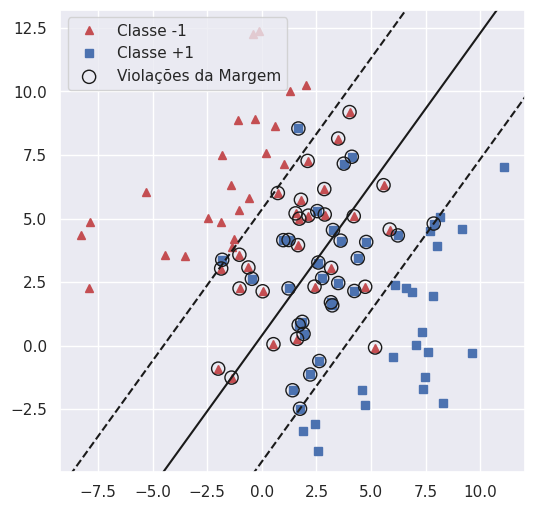

In [ ]:
#@title

import matplotlib.pyplot as plt
import numpy as np

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-50, 50)
yy = a * xx - (clf.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(figsize = (6, 6))

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = 'Classe -1')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'Classe +1')

plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s = 90,
        facecolors="none",
        zorder=10,
        edgecolors="k", label = 'Violações da Margem')

xl = plt.xlim()
yl = plt.ylim()

plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

plt.xlim(xl)
plt.ylim(yl)

plt.legend(loc = 'best');

Nesse caso, os **vetores de suporte** serão todos os elementos que estiverem sobre a margem ou que a violarem.

## SVM para casos não linearmente separáveis

Considere o conjunto de pontos abaixo. Há algum hiperplano capaz de separar os pontos de acordo com as classes?

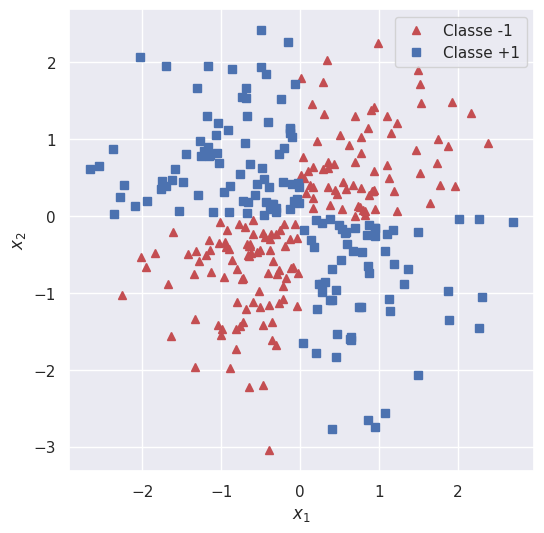

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

plt.figure(figsize = (6,6))

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'r^', label = 'Classe -1')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs', label = 'Classe +1')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend(loc = 'best');

Assim como no caso acima, em muitas situações, os elementos de um conjunto de dados não podem ser separados de uma forma satisfatória por uma função linear (hiperplano).

Nesses casos, o que vimos até agora não é suficiente!

No entanto, nem tudo está perdido, ainda é possível utilizar o SVM que vimos. Para isso, vamos transformar o nosso conjunto de dados com uma função de transformação $\phi$.

A ideia é escolher uma função $\phi$ tal que o novo conjunto de dados $D' = \{(\phi(\mathbf{x}_i), y_i)\}_{i = 1}^n$ possa ser bem separado por uma função linear.

### Exemplo I

Famosa figura da Wikipedia. Fonte [aqui](https://en.wikipedia.org/wiki/Support-vector_machine).

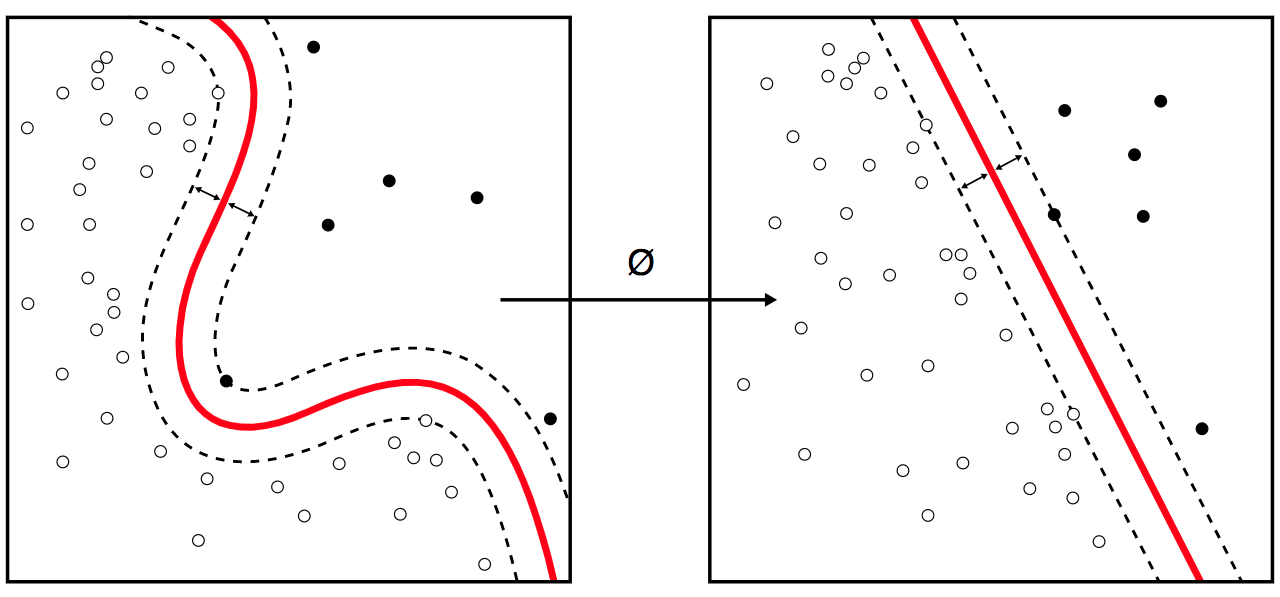

### Exemplo II

Também da Wikipedia. Fonte [aqui](https://en.wikipedia.org/wiki/Support-vector_machine).

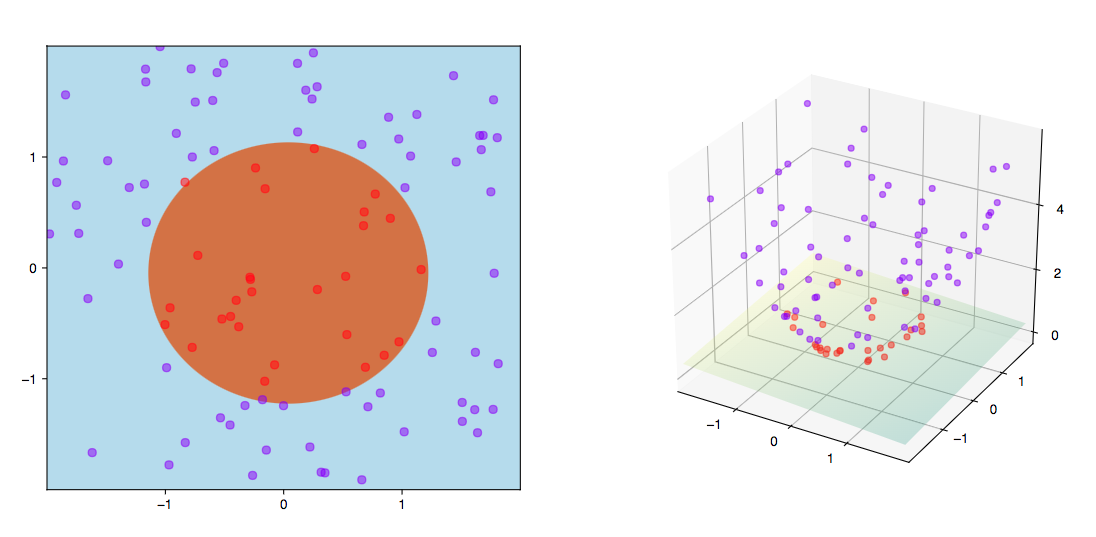

No caso acima, tem-se que $\phi: \mathbb{R}^2 → \mathbb{R}^3$, com
$$
\phi(a, b) = (a, b, a^2 + b^2).
$$

Veja que após a transformação, um plano consegue separar os pontos das duas classes de forma aproximada.

### Em resumo

Vamos aplicar uma transformação $\phi$ nos dados e usar o SVM que vimos até então!

Pergunta-se:
1. Sempre é possível fazer essa transformação?
2. Qual é uma boa $\phi$ que vai funcionar em geral?

### Teorema de Cover

Versão extraída da [Wikipedia](https://en.wikipedia.org/wiki/Cover%27s_theorem).

Por **Thomas M. Cover**, 1965.

*A complex pattern-classification problem, cast in a high-dimensional space nonlinearly, is more likely to be linearly separable than in a low-dimensional space, provided that the space is not densely populated.*

### Ideia

Vamos usar uma $\phi$ que mapeie nossos pontos para uma dimensão **infinita**. Essa transformação vai potencializar a chance do novo conjunto de dados ser linearmente separável após a transformação!

### Formulação do problema

**Objetivo**
$$\min_{\mathbf{w}, b, \xi}\frac{1}{2}\Vert\mathbf{w}\Vert^2 + C\sum_{i = 1}^n\xi_i$$

**Restrições**
1. $y_i(\mathbf{w}^T\phi(\mathbf{x}_i) + b) \ge 1 - \xi_i$, $i = 1, \dots, n$
2. $\xi_i \ge 0$, $i = 1, \dots, n$.

Repare que $\mathbf{w}$ deve ser um vetor de dimensão infinita... Assim, a resolução do problema primal passa a ser inviável...

### O truque do *Kernel*

A solução do problema de otimização acima é bem mais complicada que as versões anteriores. Isso se deve ao fato de $\phi(\mathbf{x})$ ter dimensionalidade alta (potencialmente infinita).

Recorre-se a um artifício chamado *Kernel*, o qual aparece de forma natural na solução do problema de otimização.

A discussão do funcionamento de um *Kernel* e como ele viabiliza a construção de uma transformação $\phi$ está fora do escopo dessa aula. Aos interessados, recomenda-se o material disponível nos Capítulos 5 e 21 do Livro [Data Mining and Machine Learning: Fundamental Concepts and Algorithms](https://dataminingbook.info/book_html/).

Um exemplo é o *kernel* RBF (*Radial Basis Function*), definido por
$$
K(\mathbf{x}, \mathbf{x}') = e^{-\gamma\Vert\mathbf{x} - \mathbf{x}'\Vert^2},
$$
onde
- $\mathbf{x}$ e $\mathbf{x}'$ são vetores do $\mathbb{R}^d$; e

- $\gamma > 0$ é uma constante e deve ser fornecida pelo usuário.

### No caso do nosso exemplo inicial

Voltando ao nosso exemplo, pode-se perceber como o SVM com *Kernel* RBF consegue separar bem problemas não lineares.

A Figura abaixo mostra o impacto que $\gamma$ e $C$ têm na **superfície de separação** e nos vetores de suporte.

Código adaptado da documentação da [``scikit-learn``](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html)

In [ ]:
from sklearn import svm

clf = svm.SVC(gamma = 1, C = 1)
#clf = svm.SVC(gamma = 1, C = 100)
#clf = svm.SVC(gamma = 100, C = 100)
clf.fit(X, Y);

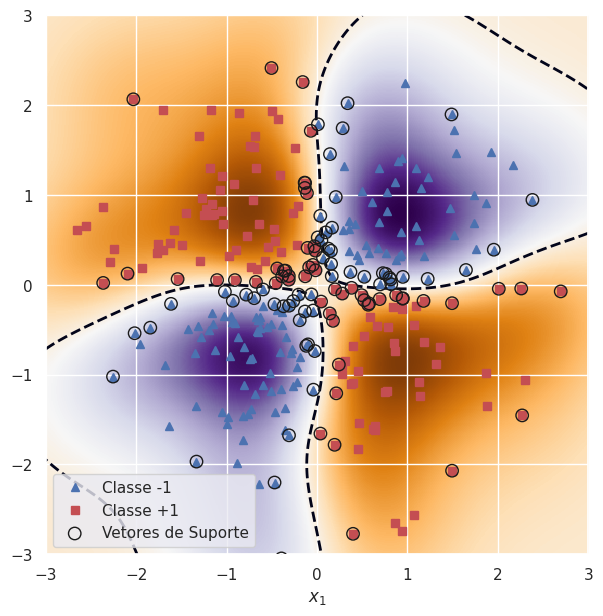

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

plt.figure(figsize = (7, 7))

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")

plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'b^', label = 'Classe -1')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'rs', label = 'Classe +1')

plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k", label = 'Vetores de Suporte'
        #cmap=cm.get_cmap("RdBu"),
    )


#plt.xticks(())
#plt.yticks(())

plt.xlabel(r'$x_1$')
plt.xlabel(r'$x_1$')
plt.legend(loc = 'best')


plt.axis([-3, 3, -3, 3]);

### Alguns aspectos práticos

1. Há vários outros tipos de *kernels*. O *kernel* RBF é um dos mais populares e utilizados;
2. Os hiperparâmetros $\gamma$ e $C$ devem ser ajustados via validação cruzada e busca exaustiva. Um exemplo [aqui](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html)
3. O SVM é sensível à escala dos dados. É uma boa prática transformar os dados de forma que todas as características estejam na mesma ordem de grandeza (se possível).

## Referências

1. Capítulos 21 do *Livro Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)